In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
data = pd.read_csv('C:\Users\HP\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\ACA00E62D72784F8862428281CB8E6402D266C68\transfers\2025-53\arin_project\heart-disease-prediction\data\heart.csv' , header = 'infer')
print(data)
data.info()
print(data.head(10))
data_type=data.dtypes
print("data type is:",data_type)

       Age  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40.0            1.0      140.0        289.0        0.0         0.0   
1     49.0            2.0      160.0        180.0        0.0         0.0   
2     37.0            1.0      130.0        283.0        0.0         1.0   
3     48.0            3.0      138.0        214.0        0.0         0.0   
4     54.0            2.0      150.0        195.0        0.0         0.0   
...    ...            ...        ...          ...        ...         ...   
2938  59.0            1.0      140.0          0.0        0.0         1.0   
2939  60.0            0.0      125.0        258.0        0.0         0.0   
2940  47.0            0.0      110.0          0.0        0.0         0.0   
2941  50.0            0.0      110.0        254.0        0.0         0.0   
2942  54.0            0.0        0.0        188.0        0.0         1.0   

      MaxHR  ExerciseAngina  Oldpeak  HeartDisease  
0     172.0             0.0      0

In [ ]:
data1 = data.copy()
data1 = data1.dropna(axis = 0)
print(data1.shape)
print(data.shape)

(2902, 10)
(2943, 10)


In [ ]:
data2 = data.copy()
data2 = data2.dropna(axis = 1)
print(data2.shape)
print(data.shape)

(2943, 0)
(2943, 10)


In [ ]:
data3 = data.copy()



for col in data3.columns:
    data3[col]=data3[col].fillna(data3[col].mean(), )

data3.info()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   float64
 1   ChestPainType   2943 non-null   float64
 2   RestingBP       2943 non-null   float64
 3   Cholesterol     2943 non-null   float64
 4   FastingBS       2943 non-null   float64
 5   RestingECG      2943 non-null   float64
 6   MaxHR           2943 non-null   float64
 7   ExerciseAngina  2943 non-null   float64
 8   Oldpeak         2943 non-null   float64
 9   HeartDisease    2943 non-null   float64
dtypes: float64(10)
memory usage: 230.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2936 non-null   float64
 1   ChestPainType   2940 non-null   float64
 2   RestingBP       29

In [ ]:
#charactaristic

col_char=pd.DataFrame(columns=["col name","null value","non nul value","uniq value"]) 

for col in data.columns:
    row={
        "col name":col,
        "null value":data[col].isna().sum(),
        "non nul value":data.shape[0]-data[col].isna().sum(),
        "uniq value":len(data[col].unique())
        

    }
    col_char=col_char._append(row,ignore_index=True)
print(col_char)

         col name null value non nul value uniq value
0             Age          7          2936         63
1   ChestPainType          3          2940          5
2       RestingBP          6          2937        107
3     Cholesterol          4          2939        390
4       FastingBS          3          2940          3
5      RestingECG          4          2939          4
6           MaxHR          5          2938        139
7  ExerciseAngina          3          2940          3
8         Oldpeak          4          2939         74
9    HeartDisease          6          2937          3


In [ ]:
data.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,2936.000000,2940.000000,2937.000000,2939.000000,2940.000000,2939.000000,2938.000000,2940.000000,2939.000000,2937.000000
mean,52.317098,1.364966,138.252979,252.661109,0.225170,0.626744,143.529272,0.412585,1.569309,0.548519
std,13.180516,1.142365,26.022163,113.638261,0.417765,0.713465,29.735172,0.492383,1.585693,0.497725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000
25%,44.000000,0.000000,120.000000,204.000000,0.000000,0.000000,124.000000,0.000000,0.100000,0.000000
50%,54.000000,1.000000,134.000000,248.000000,0.000000,0.000000,145.000000,0.000000,1.200000,1.000000
75%,61.250000,2.000000,150.000000,306.000000,0.000000,1.000000,165.000000,1.000000,2.400000,1.000000
max,80.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
numeric_columns = data.select_dtypes(include=[int, float]).columns
# Perform sum operation only on numeric columns
sum = data[numeric_columns].sum()
print("Sum is:")
print(sum)

Sum is:
Age               153603.0
ChestPainType       4013.0
RestingBP         406049.0
Cholesterol       742571.0
FastingBS            662.0
RestingECG          1842.0
MaxHR             421689.0
ExerciseAngina      1213.0
Oldpeak             4612.2
HeartDisease        1611.0
dtype: float64


In [ ]:
for column in data.columns:
    if data[column].dtype in [int, float]:
        column_values = data[column].dropna() # Drop missing values
        if len(column_values) > 0: # Check if there are any non-missing values
            column_range = column_values.max() - column_values.min()
            print(f"Range for column '{column}': {column_range}")
        else:
            print(f"Column '{column}' contains only missing values, skipping...")
    else:
        print(f"Column '{column}' is not numeric, skipping...")


Range for column 'Age': 80.0
Range for column 'ChestPainType': 3.0
Range for column 'RestingBP': 200.0
Range for column 'Cholesterol': 603.0
Range for column 'FastingBS': 1.0
Range for column 'RestingECG': 2.0
Range for column 'MaxHR': 202.0
Range for column 'ExerciseAngina': 1.0
Range for column 'Oldpeak': 8.8
Range for column 'HeartDisease': 1.0


In [ ]:
for column in data.columns:
    if data[column].dtype in [int, float]:
        column_values = data[column].dropna() # Drop missing values
    # Calculate median
        median = column_values.median()
    # Calculate mode
        mode = column_values.mode().values[0] 
        print(f"Column '{column}':")
        print(f"Median: {median}")
        print(f"Mode: {mode}\n")
    else:
        print(f"Column '{column}' is not numeric, skipping...\n")

Column 'Age':
Median: 54.0
Mode: 58.0

Column 'ChestPainType':
Median: 1.0
Mode: 0.0

Column 'RestingBP':
Median: 134.0
Mode: 120.0

Column 'Cholesterol':
Median: 248.0
Mode: 0.0

Column 'FastingBS':
Median: 0.0
Mode: 0.0

Column 'RestingECG':
Median: 0.0
Mode: 0.0

Column 'MaxHR':
Median: 145.0
Mode: 150.0

Column 'ExerciseAngina':
Median: 0.0
Mode: 0.0

Column 'Oldpeak':
Median: 1.2
Mode: 0.0

Column 'HeartDisease':
Median: 1.0
Mode: 1.0



In [ ]:
# Iterate through each column and find the variance
for column in data.columns:
    if data[column].dtype in [int, float]:
        column_variance = data[column].var() # Compute variance
        print(f"Variance for column '{column}': {column_variance}")
    else:
        print(f"Column '{column}' is not numeric, skipping...")

Variance for column 'Age': 173.7259903494887
Column 'Sex' is not numeric, skipping...
Variance for column 'ChestPainType': 1.304998807961429
Variance for column 'RestingBP': 677.1529415639418
Variance for column 'Cholesterol': 12913.654344718838
Variance for column 'FastingBS': 0.17452787171350337
Variance for column 'RestingECG': 0.5090326542117681
Variance for column 'MaxHR': 884.1804503375051
Variance for column 'ExerciseAngina': 0.24244108667624922
Variance for column 'Oldpeak': 2.5144219529803995
Variance for column 'HeartDisease': 0.247730264714314


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()
    print(f"Column '{column}':")
    print("Unique values:")
    print(unique_values)
    print("\nValue counts:")
    print(value_counts)
    print("\n")

Column 'Age':
Unique values:
[40. 49. 37. 48. 54. 39. 45. nan 58. 42. 38. 43. 60. 36. 44. 53. 52. 51.
 56. 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29.
 62. 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71. 24. 79. 27.
 23. 20. 78. 25. 22. 26. 21. 80.  0.]

Value counts:
Age
58.0    132
54.0    116
57.0    109
59.0    100
52.0     95
       ... 
75.0     14
28.0     13
21.0     12
80.0     12
0.0       4
Name: count, Length: 62, dtype: int64


Column 'Sex':
Unique values:
['Male' 'Female' nan '0']

Value counts:
Sex
Male      2194
Female     737
0            4
Name: count, dtype: int64


Column 'ChestPainType':
Unique values:
[ 1.  2.  3.  0. nan]

Value counts:
ChestPainType
0.0    960
2.0    799
3.0    617
1.0    564
Name: count, dtype: int64


Column 'RestingBP':
Unique values:
[140. 160. 130. 138. 150. 120. 110. 136.  nan 115. 100. 124. 113. 125.
 145. 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128.   0. 106.
  92. 200. 122.  98. 105. 133.  95.  

1.Histogram Graphs


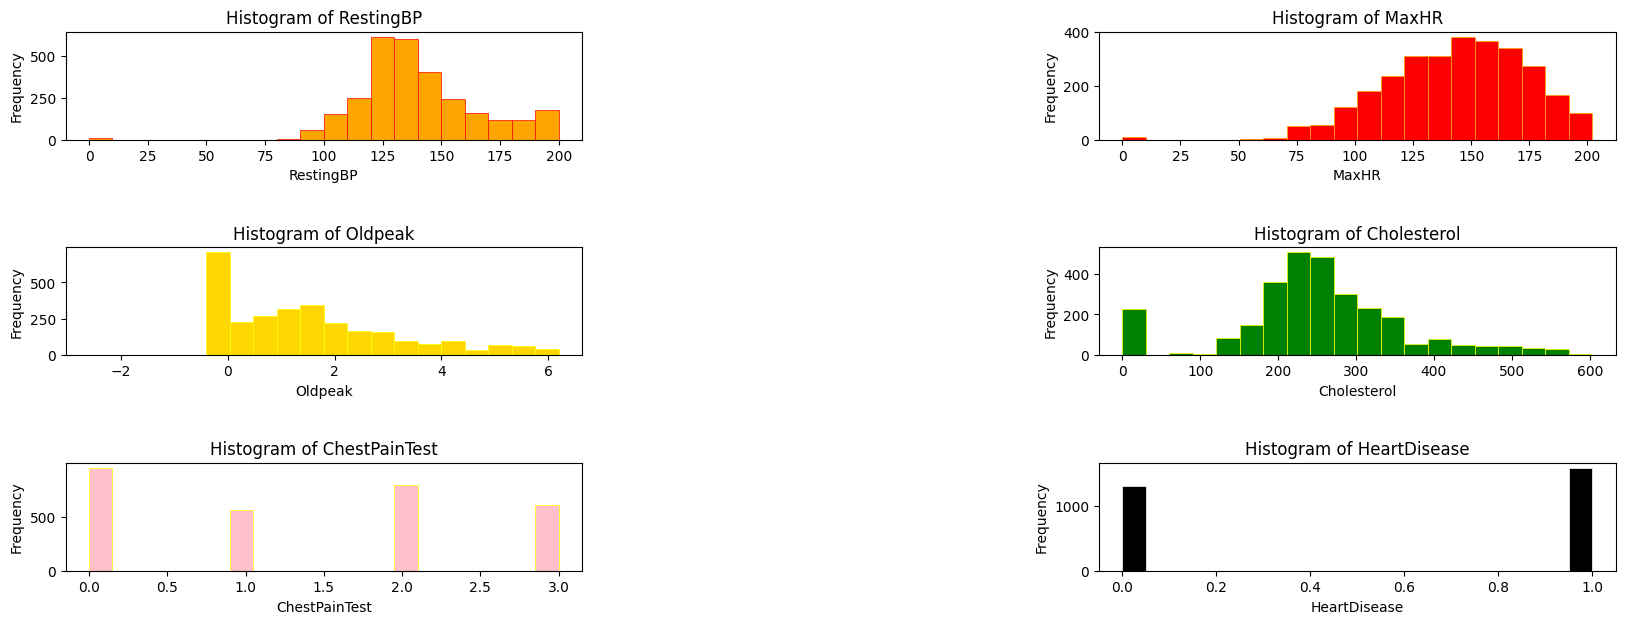

In [ ]:
data5 = data.copy()
data5 = data5.dropna()
print("1.Histogram Graphs")
plt.figure(figsize=(20, 7))
plt.subplot(3,2,1)
plt.hist(data5['RestingBP'], bins=20, color='orange', edgecolor ='red',linewidth =0.5 )
plt.title('Histogram of RestingBP')
plt.xlabel("RestingBP")
plt.ylabel("Frequency")
plt.subplot(3,2,2)
plt.hist(data5['MaxHR'], bins=20, color='Red', edgecolor ='orange', linewidth=0.5)
plt.title('Histogram of MaxHR')
plt.xlabel("MaxHR")
plt.ylabel("Frequency")
plt.subplot(3,2,3)
plt.hist(data5['Oldpeak'], bins=20, color='gold', edgecolor ='yellow',linewidth =0.5)
plt.title('Histogram of Oldpeak')
plt.xlabel("Oldpeak")
plt.ylabel("Frequency")
plt.subplot(3,2,4)
plt.hist(data5['Cholesterol'], bins=20, color='green', edgecolor ='yellow',linewidth =0.5)
plt.title('Histogram of Cholesterol')
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.subplot(3,2,5)
plt.hist(data5['ChestPainType'], bins=20, color='pink', edgecolor ='yellow',linewidth =0.5)
plt.title('Histogram of ChestPainTest')
plt.xlabel("ChestPainTest")
plt.ylabel("Frequency")
plt.subplot(3,2,6)
plt.hist(data5['HeartDisease'], bins=20, color='black', edgecolor ='white',linewidth =0.5)
plt.title('Histogram of HeartDisease')
plt.xlabel("HeartDisease")
plt.ylabel("Frequency")
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)
plt.show()

2.Bar Graph


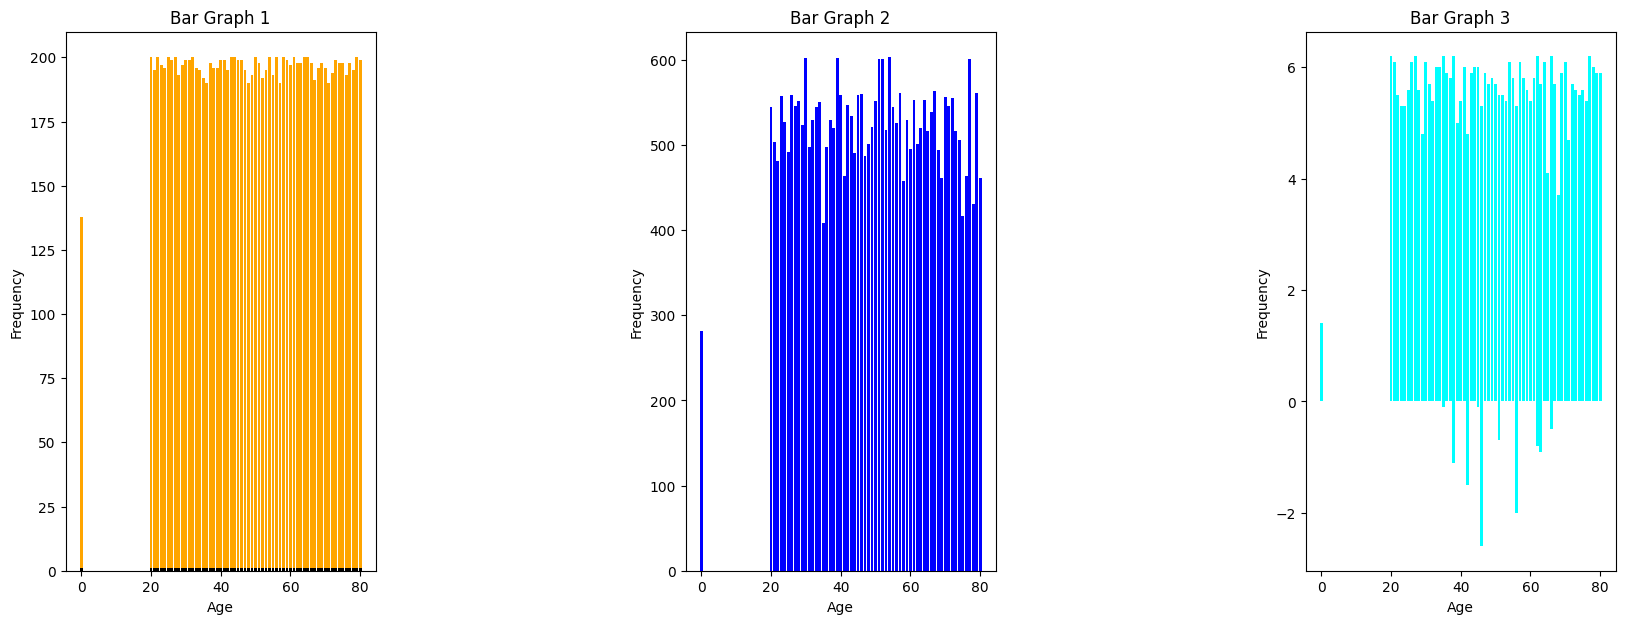

In [ ]:
print("2.Bar Graph")
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
plt.bar(data5['Age'] ,data5['RestingBP'], color='orange', align ='center' )
plt.bar(data5['Age'],data5['ExerciseAngina'], color='black', align ='center' )
plt.title('Bar Graph 1')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.subplot(1,3,2)
plt.bar(data5['Age'] ,data5['ChestPainType'], color='green', align ='center' )
plt.bar(data5['Age'],data5['Cholesterol'], color='blue', align ='center' )
plt.title('Bar Graph 2')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.subplot(1,3,3)
plt.bar(data5['Age'] ,data5['FastingBS'], color='magenta', align ='center' )
plt.bar(data5['Age'],data5['Oldpeak'], color='cyan', align ='center' )
plt.title('Bar Graph 3')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)
plt.show()

3.Line Graph


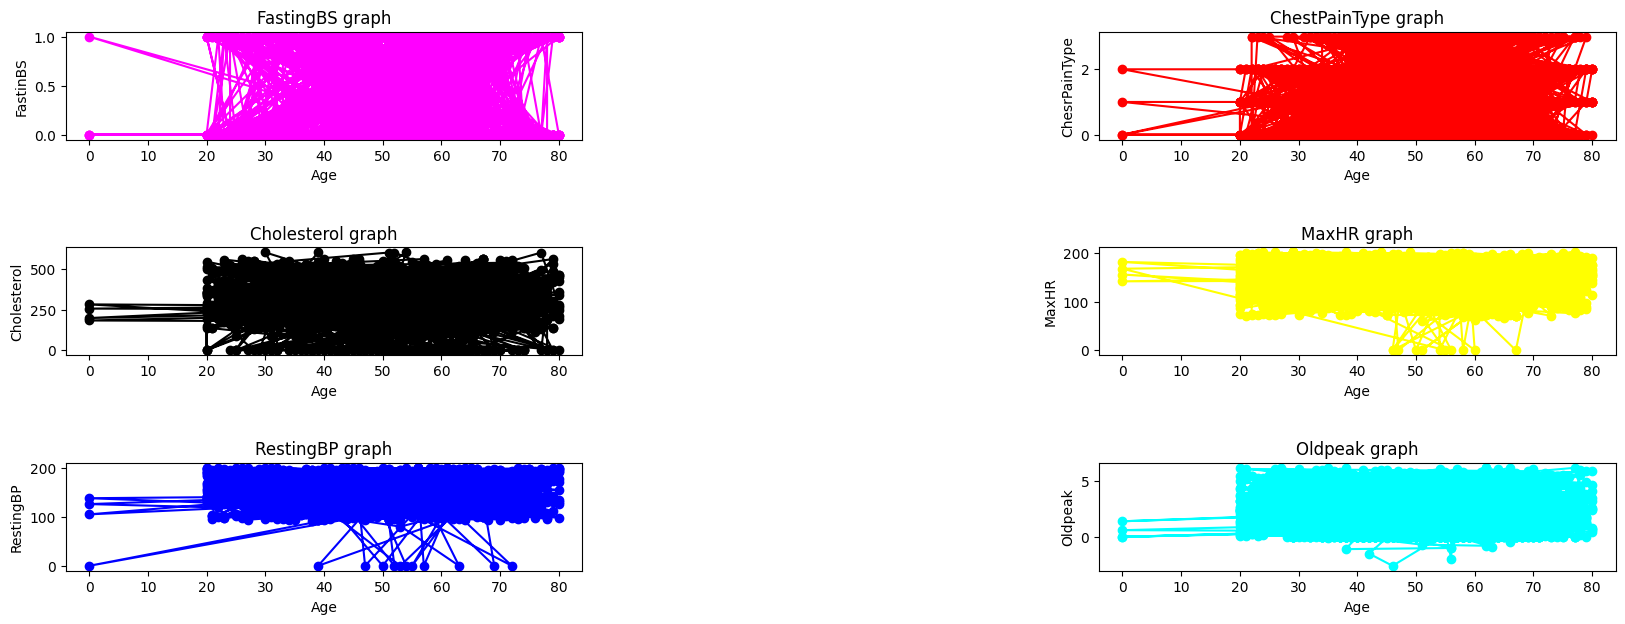

In [ ]:
print("3.Line Graph")
plt.figure(figsize=(20, 7))
plt.subplot(3,2,1)
plt.plot(data5['Age'],data5['FastingBS'], color='magenta', linestyle='-',marker='o' )
plt.title('FastingBS graph')
plt.xlabel("Age")
plt.ylabel("FastinBS")
plt.subplot(3,2,2)
plt.plot(data5['Age'],data5['ChestPainType'], color='red', linestyle='-',marker='o' )
plt.title('ChestPainType graph')
plt.xlabel("Age")
plt.ylabel("ChesrPainType")
plt.subplot(3,2,3)
plt.plot(data5['Age'],data5['Cholesterol'], color='black', linestyle='-',marker='o' )
plt.title('Cholesterol graph')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.subplot(3,2,4)
plt.plot(data5['Age'],data5['MaxHR'], color='yellow', linestyle='-', marker='o')
plt.title('MaxHR graph')
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.subplot(3,2,5)
plt.plot(data5['Age'],data5['RestingBP'], color='blue', linestyle='-',marker='o' )
plt.title('RestingBP graph')
plt.xlabel("Age")
plt.ylabel("RestingBP")
plt.subplot(3,2,6)
plt.plot(data5['Age'],data5['Oldpeak'], color='cyan', linestyle='-', marker='o')
plt.title('Oldpeak graph')
plt.xlabel("Age")
plt.ylabel("Oldpeak")
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
import statistics as stats
data4 = data.copy()
data4_withoutlast_colum=data4.columns[:-1]


for col in data4_withoutlast_colum:
    data4[col]=data4[col].fillna(data4[col].mean(), )

mode=stats.mode(data4.loc[~data4.loc[:,"HeartDisease"].isna(),"HeartDisease"])
data4.loc[data4.loc[:,"HeartDisease"].isna(),"HeartDisease"]=mode
    
    


    
X = data4.drop(columns=['HeartDisease']) # Features
print(X.info())
print(data4.info())
y = data4['HeartDisease'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#This ensures that the data is split in the same way every time the code is run, which is useful for debugging, testing, and comparing different models
k = int(input("Enter the number of nearest neighbors to be used : "))
model = KNeighborsClassifier(n_neighbors=k,weights = 'distance')

model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   float64
 1   ChestPainType   2943 non-null   float64
 2   RestingBP       2943 non-null   float64
 3   Cholesterol     2943 non-null   float64
 4   FastingBS       2943 non-null   float64
 5   RestingECG      2943 non-null   float64
 6   MaxHR           2943 non-null   float64
 7   ExerciseAngina  2943 non-null   float64
 8   Oldpeak         2943 non-null   float64
dtypes: float64(9)
memory usage: 207.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   float64
 1   ChestPainType   2943 non-null   float64
 2   RestingBP       2943 non-null   float64
 3   Cholesterol    

Enter the number of nearest neighbors to be used :  3


Accuracy: 0.7249575551782682
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       262
         1.0       0.74      0.78      0.76       327

    accuracy                           0.72       589
   macro avg       0.72      0.72      0.72       589
weighted avg       0.72      0.72      0.72       589

Confusion Matrix:
[[171  91]
 [ 71 256]]
